In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from scripts import *

# Gap statistic

## What is?

The gap statistic was developed by Stanford researchers Tibshirani, Walther and Hastie in their 2001 paper. The idea behind their approach was to find a way to compare cluster compactness with a null reference distribution of the data, i.e. a distribution with no obvious clustering. Their estimate for the optimal number of clusters is the value for which cluster compactness on the original data falls the farthest below this reference curve. This information is contained in the following formula for the gap statistic: \

$$Gap_n(k)=E^*_n\{log(W_k)\}-log(W_k)$$

where


$W_k$ = compactness of our clustering based on the *Within-Cluster-Sum of Squared Errors* (WSS).

WSS is calculated as:
$$D_k=2n_k\sum_{x_i\in C_k}||x_i - \mu_k||^2$$

The WSS is calculated by the inertia_ attribute of sklearn.cluster.KMeans functions as follows:
- The square of the distance of each point from the centre of the cluster (Squared Erros)
- The WSS score is the sum of these Squared Errors for all the points


source:
https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad

## Calculating Gap statistic

In [40]:
df = pd.read_csv("../data/country-data.csv")
df_pca_clusters = pd.read_csv("../data/country-data-pca-w-clusters.csv")
df_pca = pd.read_csv("../data/country-data-pca.csv")

In [8]:
# calculating intra cluster variance for each cluster
IVS = ICV(df_pca_clusters)

In [ ]:
def wcss(cluster: pd.DataFrame) -> float:
  cluster = cluster.values.tolist()
# Calculate the centroid of the cluster
  centroid = np.mean(cluster, axis=0)
  
  # Initialize the WCSS to 0
  wcss = 0

  # Iterate over each data point in the cluster
  for point in cluster:
    # Calculate the squared distance between the data point and the centroid
    squared_distance = np.sum((point - centroid)**2)
    # Add the squared distance to the WCSS
    wcss += squared_distance

  # WCSS is the sum of the squared distances for all the data points in the cluster
  return wcss

/Users/maxvisser/.pyenv/versions/3.9.4/envs/stats_exam/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/maxvisser/.pyenv/versions/3.9.4/envs/stats_exam/lib/python3.9/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/maxvisser/.pyenv/versions/3.9.4/envs/stats_exam/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/maxvisser/.pyenv/versions/3.9.4/envs/stats_exam/lib/python3.9/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/maxvisser/.pyenv/versions/3.9.4/envs/stats_exam/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/maxvisser/

Text(0.5, 0, 'k')

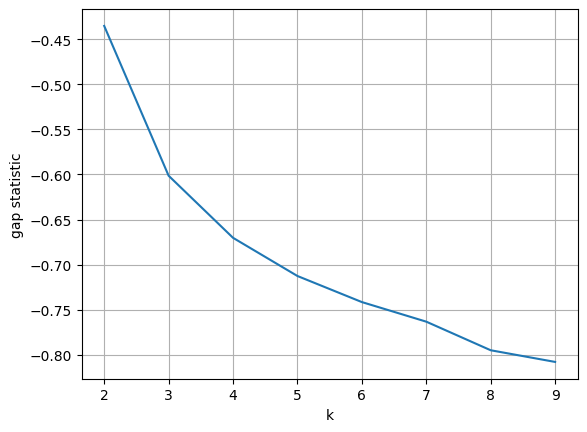

In [42]:
def gap_statistic(df: pd.DataFrame, n_clusters):
  """Calculate the gap statistic for a given dataset and number of clusters.

  Parameters
  ----------
  data : numpy array
    The data to cluster.
  n_clusters : int
    The number of clusters to use.

  Returns
  -------
  float
    The gap statistic.
  """
  df = np.array(df.values.tolist())
  # Use KMeans to cluster the data into n_clusters clusters
  kmeans = KMeans(n_clusters=n_clusters)
  kmeans.fit(df)

  # Calculate the WCSS of the clusters
  wcss = kmeans.inertia_

  # Generate a reference distribution of the data by randomly assigning the data points to clusters
  reference_distribution = np.random.randint(low=0, high=n_clusters-1, size=df.shape[0])

  # Calculate the WCSS for the reference distribution
  reference_wcss = 0
  for i in range(n_clusters):
    cluster = df[reference_distribution == i]
    centroid = np.mean(cluster, axis=0)
    for point in cluster:
      squared_distance = np.sum((point - centroid)**2)
      reference_wcss += squared_distance

  # Calculate the gap statistic as the difference between the WCSS of the clusters and the WCSS of the reference distribution, normalized by the WCSS of the reference distribution
  gap = (wcss - reference_wcss) / reference_wcss
  return gap

k = np.arange(2, 10)
g = []
for i in k:
  g.append(gap_statistic(df=df_pca.drop("country", axis=1), n_clusters=i))

plt.plot(k, g)
plt.grid()
plt.ylabel("gap statistic")
plt.xlabel("k")


In [ ]:
clusters = split_in_clusters(df_pca_clusters)
wcss(clusters[0])

2.062454818115534